### Importación de datos



In [13]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#1. Análisis de facturación



In [37]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

In [39]:
suma_precios_tienda = [tienda["Precio"].sum() for tienda in tiendas]

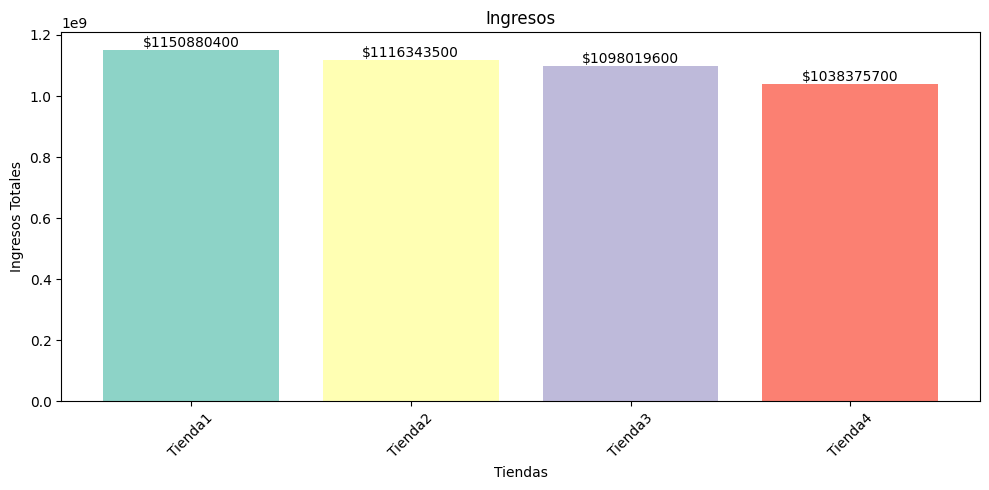

In [40]:
def ingresosTiendas():
    plt.figure(figsize=(10, 5))
    import matplotlib as mpl
    colores = mpl.colormaps['Set3']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.bar(nombres, suma_precios_tienda, color=colors)

    plt.xlabel("Tiendas")
    plt.ylabel("Ingresos Totales")
    plt.title("Ingresos")
    plt.xticks(rotation=45)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1000,
            f'${int(height)}',
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()

ingresosTiendas()

# 2. Ventas por categoría

In [41]:
def categorias_tiendas(tienda, nombre):
  categorias = {}
  for i in range(len(tienda)):
      categoria = tienda.loc[i, "Categoría del Producto"]

      if categoria in categorias:
          categorias[categoria] += 1
      else:
          categorias[categoria] = 1
  print(categorias)
  return graficos_tiendas(categorias, nombre)



In [44]:
def graficos_tiendas(categorias,nombre):
  plt.figure(figsize=(10, 5))
  colores = mpl.colormaps['cividis']
  colors = [colores(i / len(nombres)) for i in range(len(nombres))]
  plt.bar(categorias.keys(), categorias.values(), color=colors)
  plt.xlabel("Categoría del Producto")
  plt.ylabel("Suma de Ventas")
  plt.title(f"Ventas por Categoría de {nombre}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


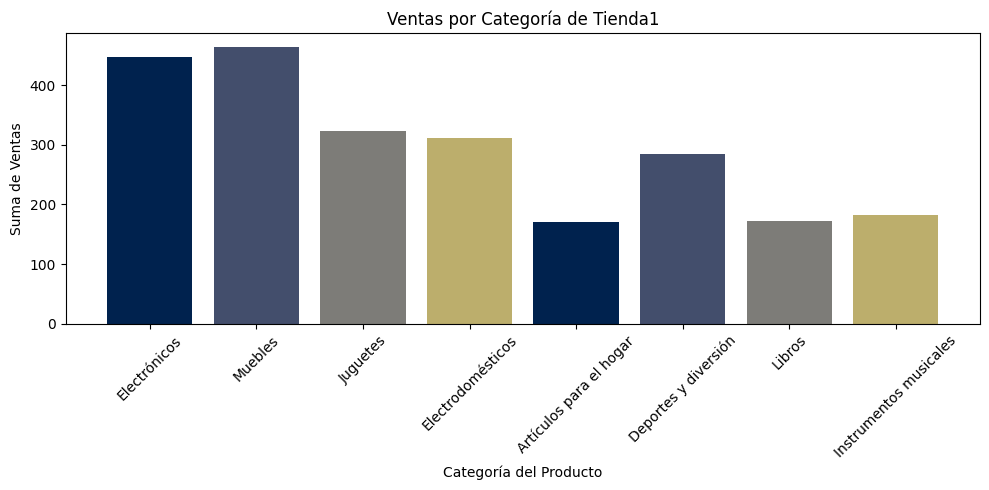

{'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}


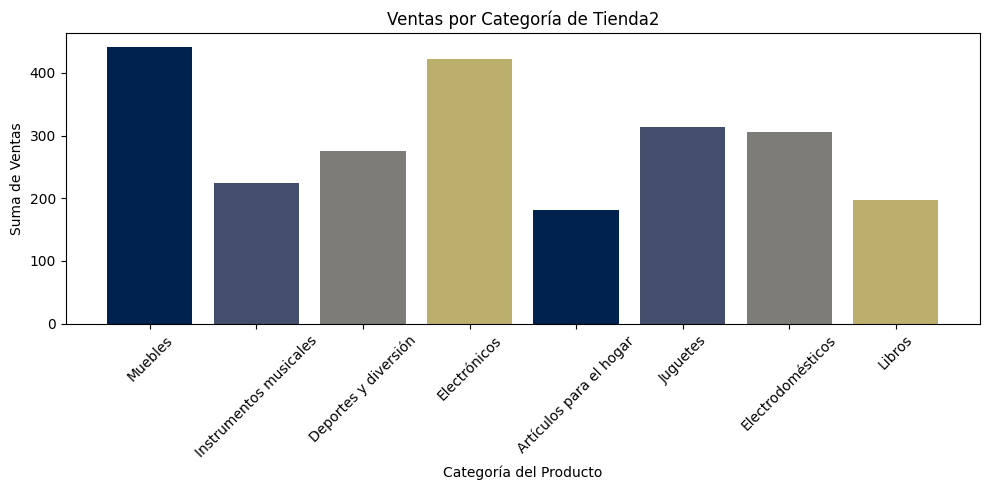

{'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}


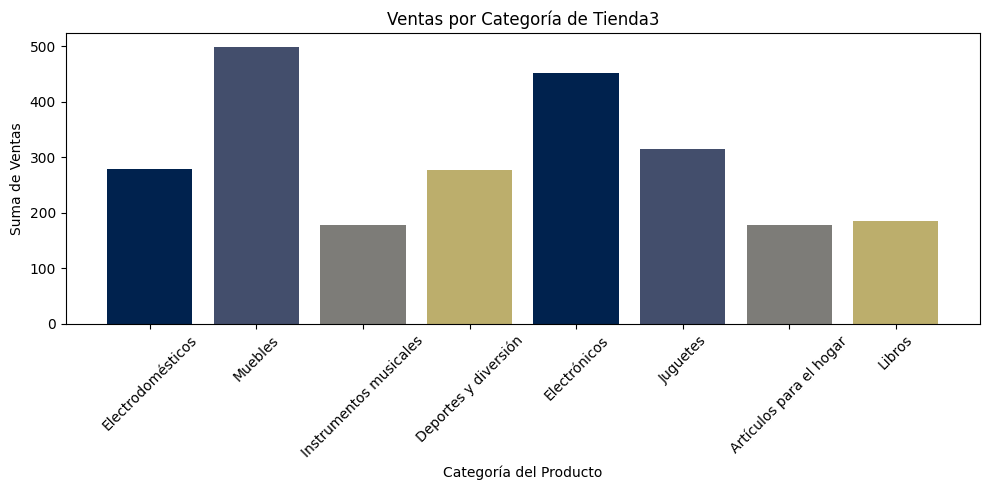

{'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}


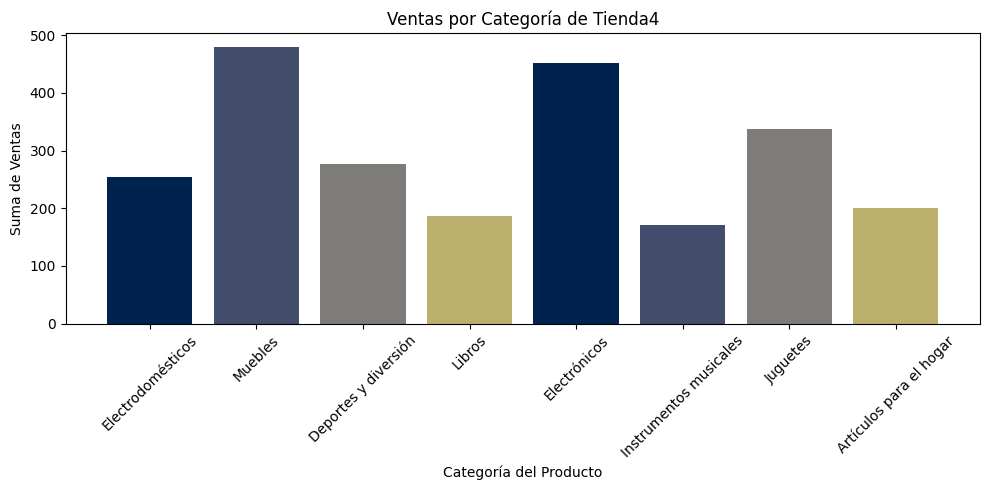

In [45]:
lista_categorias = [categorias_tiendas(tienda, i) for tienda, i in zip(tiendas, nombres)]


# 3. Calificación promedio de la tienda


In [46]:
def valoracion_promedio(tienda):
  promedio = round(tienda['Calificación'].sum()/len(tienda),2)
  return promedio

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


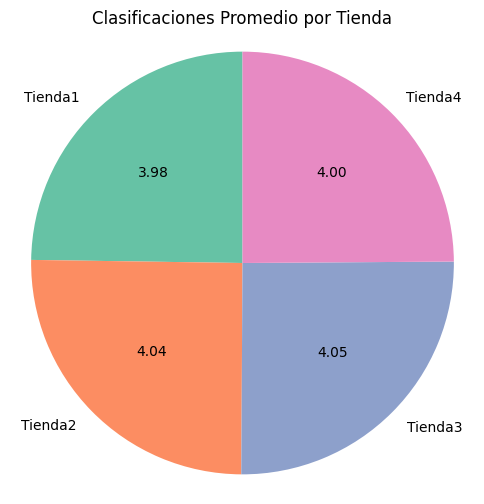

In [47]:
valores = [valoracion_promedio(tienda) for tienda in tiendas]
print(valores)
def mostrar_valor(pct, valores):
    total = sum(valores)
    valor = pct * total / 100.0
    return f'{valor:.2f}'

plt.figure(figsize=(6, 6))
colores = mpl.colormaps['Set2']
colors = [colores(i) for i in range(len(nombres))]
plt.pie(valores, labels=nombres, autopct=lambda pct: mostrar_valor(pct, valores),
        startangle=90, colors=colors)
plt.title('Clasificaciones Promedio por Tienda')
plt.axis('equal')
plt.show()

# 4. Productos más y menos vendidos

In [48]:
def mayor_y_menor(tienda):
  productos = {}
  for i in range(len(tienda)):
    producto = tienda.loc[i, "Producto"]

    if producto in productos:
      productos[producto] += 1
    else:
      productos[producto] = 1
  productos_ordenados = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))
  mas_vendido = next(iter(productos_ordenados.items()))
  menos_vendido = next(reversed(productos_ordenados.items()))
  return mas_vendido, menos_vendido, productos_ordenados

In [50]:
def mostrar_mas_y_menos_vendido(tienda,nombre):
    mas_vendido, menos_vendido, productos_ordenados = mayor_y_menor(tienda)

    productos = [mas_vendido[0], menos_vendido[0]]
    cantidades = [mas_vendido[1], menos_vendido[1]]

    colores = [ '#3B528B','#0D47A1' ]

    plt.figure(figsize=(8, 4))
    bars = plt.barh(productos, cantidades, color=colores)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 f'{int(width)} ventas', va='center')

    plt.xlim(0, max(cantidades) + 10)
    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Producto Menos Vendido vs. Más Vendido en {nombre}")
    plt.tight_layout()
    plt.show()

In [51]:
def mostrar_productos_ordenados(tienda, nombre):
    _, _, productos_ordenados = mayor_y_menor(tienda)

    productos = list(productos_ordenados.keys())
    cantidades = list(productos_ordenados.values())

    plt.figure(figsize=(10, 6))
    colores = mpl.colormaps['tab10']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.barh(productos, cantidades, color=colors)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', va='center')

    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Productos Ordenados por Ventas en {nombre}")
    plt.tight_layout()
    plt.show()

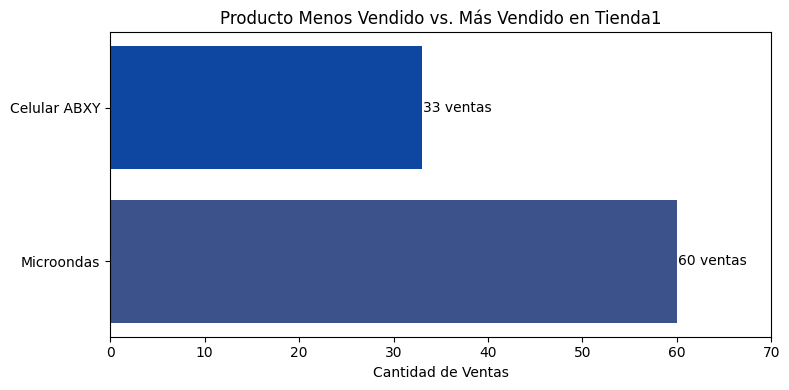

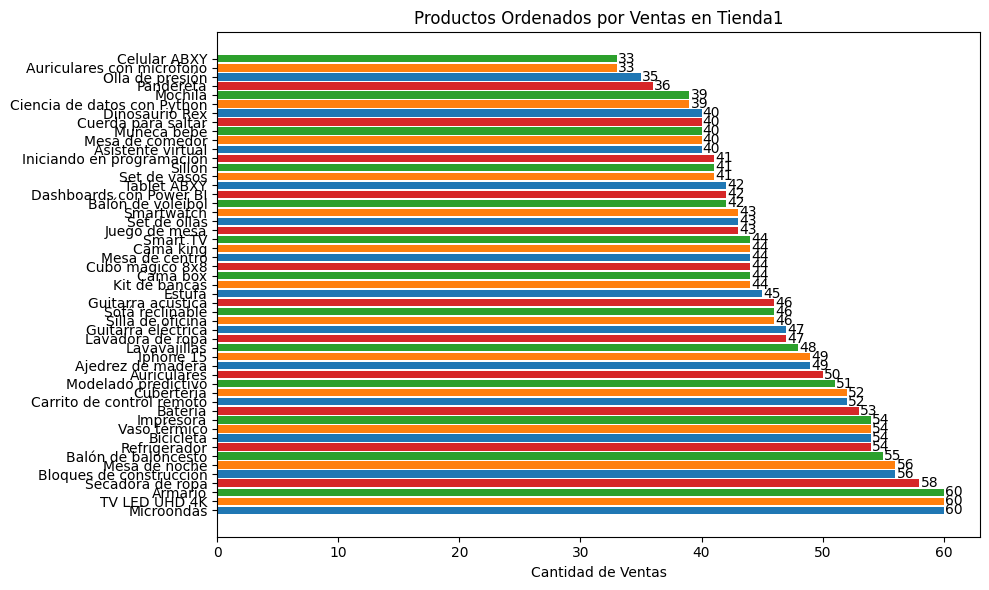

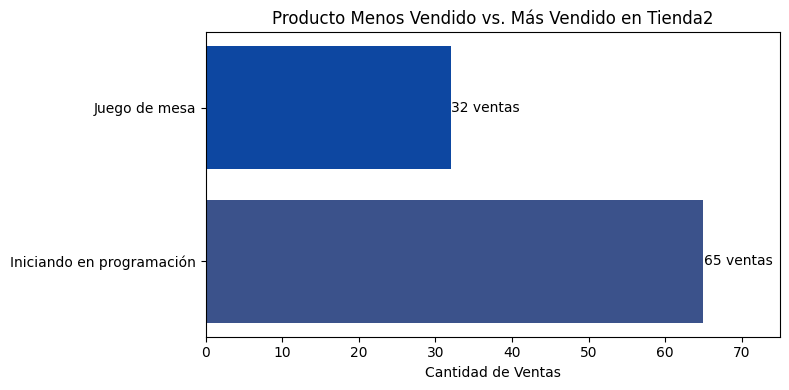

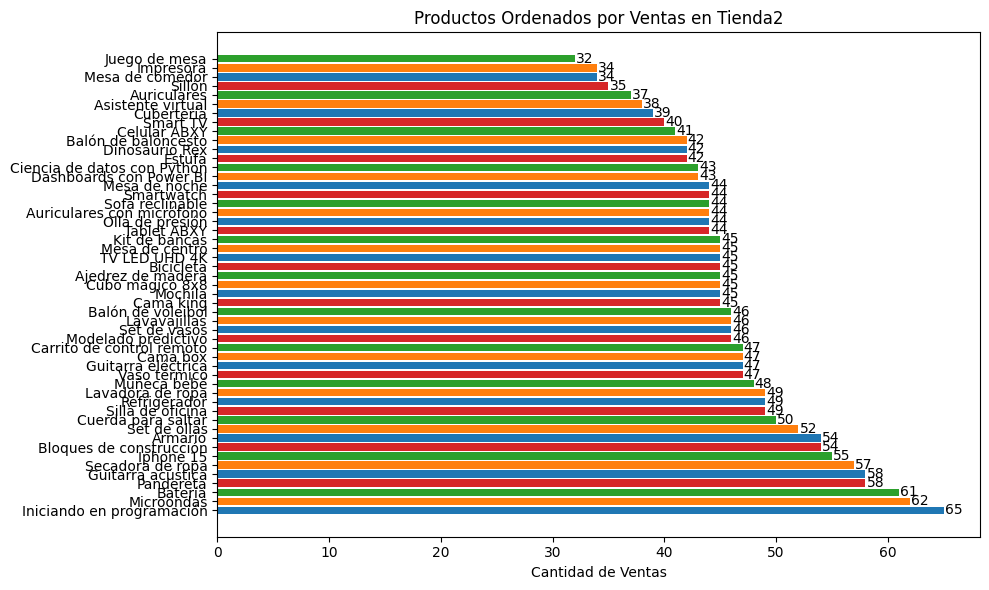

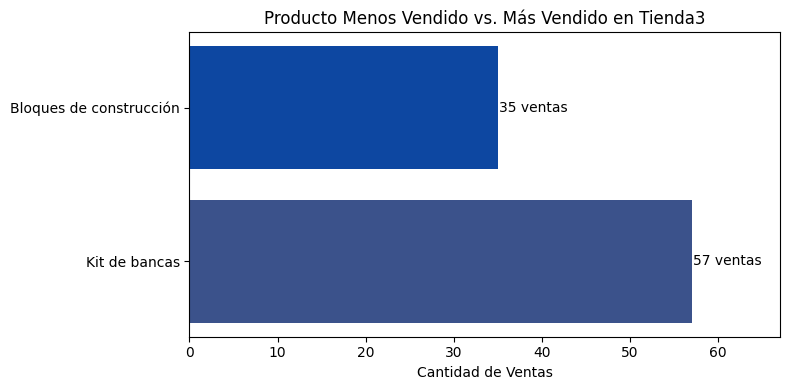

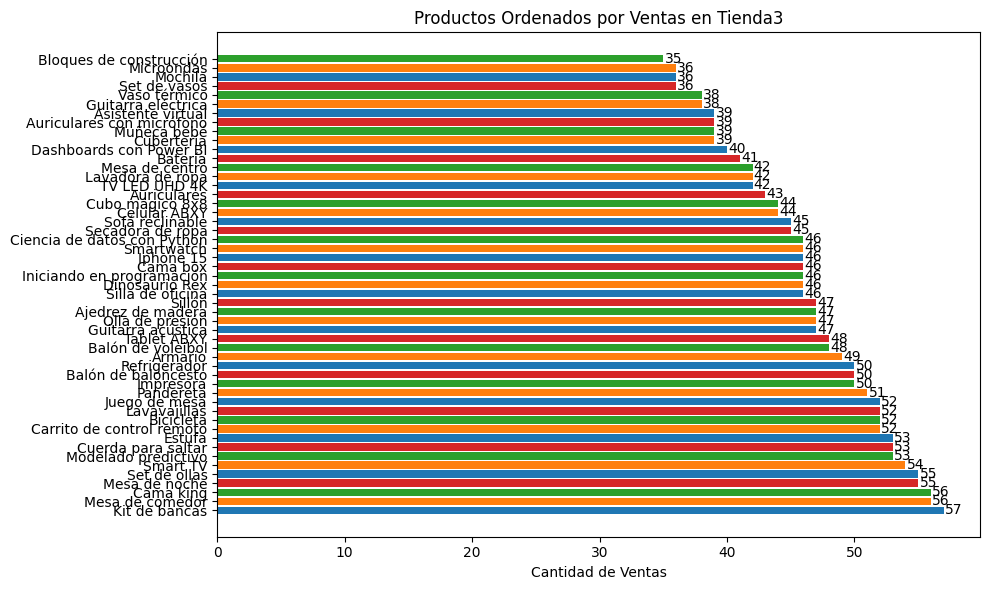

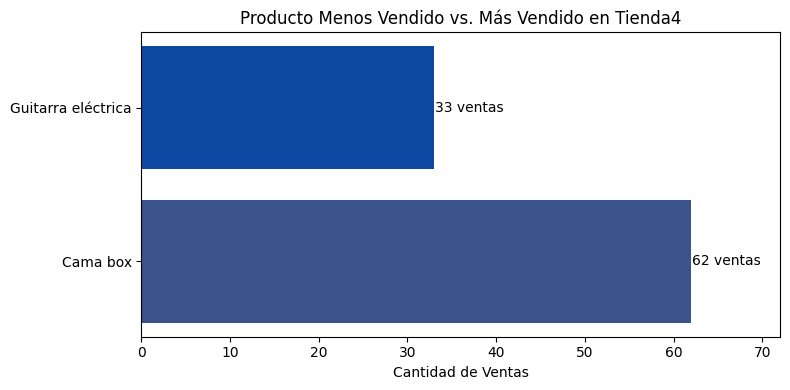

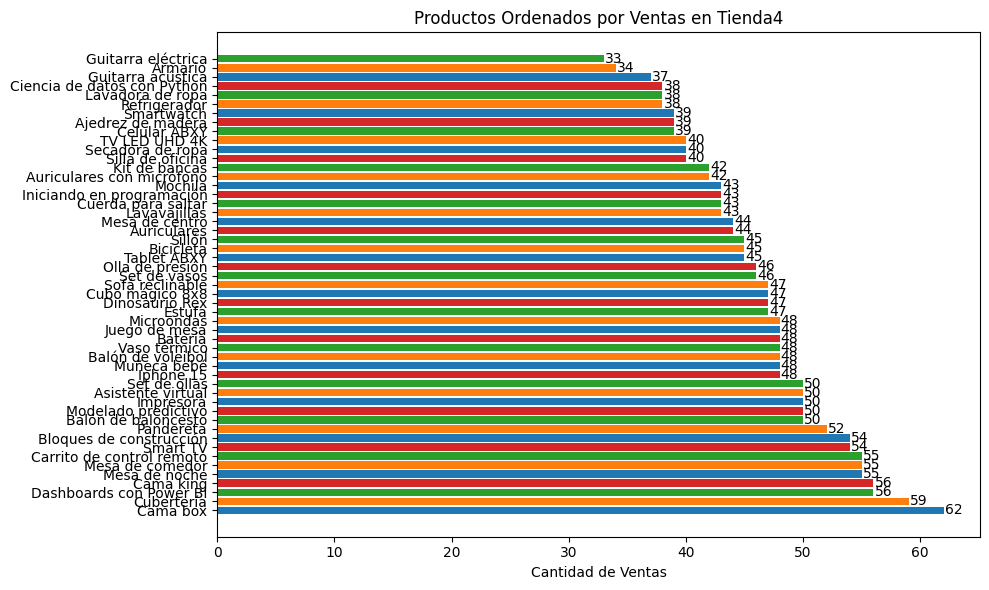

In [52]:
for tienda, nombre in zip(tiendas,nombres):
  mostrar_mas_y_menos_vendido(tienda,nombre)
  mostrar_productos_ordenados(tienda,nombre)

# 5. Envío promedio por tienda

In [53]:
def promedio_envio(tienda):
  promedio = round(tienda['Costo de envío'].sum()/len(tienda))
  return float(promedio)

lista_promedios = [promedio_envio(tienda) for tienda in tiendas]


In [54]:
def graficos_promedio_envio(promedios):
    plt.figure(figsize=(8, 5))
    colores = mpl.colormaps['Set2']
    colors = [colores(i) for i in range(len(promedios))]

    bars = plt.bar(nombres, promedios, color=colors)

    plt.xlabel("Tiendas")
    plt.ylabel("Costo Promedio de Envío")
    plt.title("Promedios de Envíos por Tienda")
    plt.xticks(rotation=45)

    max_val = max(promedios)
    plt.ylim(top=max_val + 2000)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 500,
            f'${int(height)}',
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()


In [55]:
def graficos_promedio_envio_pie(promedios):
    plt.figure(figsize=(3, 3))
    colores = mpl.colormaps['Set1']
    colors = [colores(i) for i in range(len(promedios))]
    plt.pie(promedios, labels=nombres, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title("Promedios de Envíos por Tienda")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

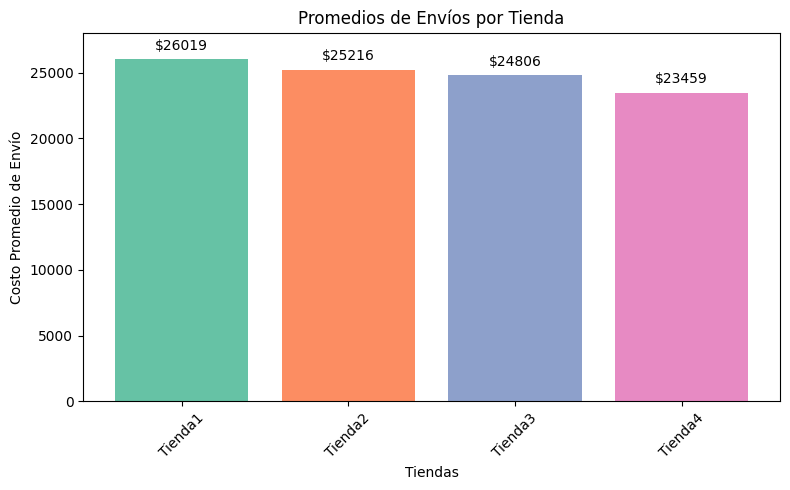

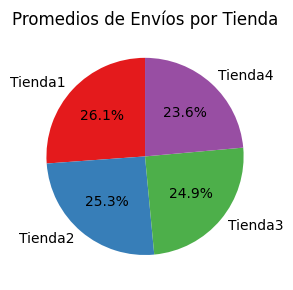

In [56]:
graficos_promedio_envio(lista_promedios)
graficos_promedio_envio_pie(lista_promedios)

Desafio extra ubicacion de las tiendas

In [57]:
import pandas as pd
import folium
from folium.plugins import HeatMap

tienda = pd.DataFrame(tienda)
tienda2 = pd.DataFrame(tienda2)
tienda3 = pd.DataFrame(tienda3)
tienda4 = pd.DataFrame(tienda4)
# Agregar columna 'Tienda' para cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames en uno solo
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Eliminar filas con latitud o longitud faltantes
df_tiendas = df_tiendas.dropna(subset=['lat', 'lon'])

# Crear mapa centrado en la media de latitud y longitud
map_center = [df_tiendas['lat'].mean(), df_tiendas['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Crear lista de datos para el heatmap: [lat, lon, intensidad]
heat_data = [[row['lat'], row['lon'], row['Precio']] for _, row in df_tiendas.iterrows()]

# Añadir capa de heatmap al mapa
HeatMap(heat_data, radius=13).add_to(m)

# Mostrar mapa
m

Observaciones para SR Juan



Resumen de lo analisado en el desarrollo

| **Aspecto**               | **Tienda 1**                                     | **Tienda 2**                                                            | **Tienda 3**                         | **Tienda 4**                                                              |
| ------------------------- | ------------------------------------------------ | ----------------------------------------------------------------------- | ------------------------------------ | ------------------------------------------------------------------------- |
| **Ingresos Totales**      | \$1.150.880.400 (más alto)                       | \$1.116.343.500                                                         | \$1.098.019.600                      | \$1.038.375.700 (más bajo)                                                |
| **Ventas Principales**    | Muebles, Electrónicos                            | Muebles, Electrónicos, Instrumentos musicales, Libros (más equilibrada) | Muebles, Electrónicos                | Muebles, Electrónicos, Juguetes (menos rendimiento en otras categorías)   |
| **Calificación Promedio** | 3.98 (más baja)                                  | 4.04                                                                    | 4.05 (más alta)                      | 4.00                                                                      |
| **Coste Promedio Envío**  | \$26.019 (más alto)                              | \$25.216                                                                | \$24.806                             | \$23.459 (más bajo)                                                       |
| **Rendimiento General**   | Alta facturación, baja satisfacción y costo alto | Equilibrada en ventas y satisfacción                                    | Mejor calificación y buen equilibrio | Peor rendimiento, baja facturación y satisfacción, bajo costo no compensa |



Recomendacion final

Se recomienda eliminar la Tienda 4, dado que es la menos rentable y presenta un desempeño deficiente en varias dimensiones clave. Aunque cuenta con un costo de envío más bajo, este beneficio no compensa sus ingresos significativamente inferiores, su calificación promedio por debajo del estándar esperado, ni su bajo rendimiento en categorías estratégicas. Además, optimizando la logística y el servicio en tiendas con mejor desempeño, como la Tienda 1, se podrá absorber y compensar eficazmente los costos de envío, mejorando la rentabilidad general del negocio.